#Multiple Sclerosis (MS) Identification



# Install Libraries and Datasets

In [ ]:
# Installing libraries

import tensorflow as tf
import random, os
import shutil
from matplotlib.image import imread
import sklearn
from sklearn.model_selection import train_test_split
import os
import random
import numpy as np
import pandas as pd
import cv2
import imageio
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.mobilenet import MobileNet
from keras.metrics import AUC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Installing the glaucoma data set

!wget https://www.dropbox.com/sh/oi9gmvg0voiyxvr/AABpuYnrTZwci8n8AKguicHka?dl=0

--2023-03-17 02:18:10--  https://www.dropbox.com/sh/oi9gmvg0voiyxvr/AABpuYnrTZwci8n8AKguicHka?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/oi9gmvg0voiyxvr/AABpuYnrTZwci8n8AKguicHka [following]
--2023-03-17 02:18:11--  https://www.dropbox.com/sh/raw/oi9gmvg0voiyxvr/AABpuYnrTZwci8n8AKguicHka
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb711e8330946899d4f3250554f.dl.dropboxusercontent.com/zip_download_get/BbyMJBsgdk4z6zRPMf-qrP14xObMjCvjlVbu1Pz408y6s4MFy2XOVYajk7CzIcxIfetb2s048dgMWlwbvkVa8QoYfhpfIVahDMfBehva9smPMQ# [following]
--2023-03-17 02:18:11--  https://ucb711e8330946899d4f3250554f.dl.dropboxusercontent.com/zip_download_get/BbyMJBsgdk4z6zRPMf-qrP14xObMjCvjlVbu1Pz408y6s4MFy2XOVYajk7CzIcxIfetb2s048dgMWlwbvkVa8QoYfhpf

In [ ]:
#Unzip the dataset

!unzip AABpuYnrTZwci8n8AKguicHka?dl=0

Archive:  AABpuYnrTZwci8n8AKguicHka?dl=0
mapname:  conversion of  failed
   creating: MS/
   creating: Normal/
 extracting: MS/6.png                
 extracting: MS/7.png                
 extracting: MS/15.png               
 extracting: MS/18.png               
 extracting: MS/19.png               
 extracting: MS/31.png               
 extracting: MS/33.png               
 extracting: MS/44.png               
 extracting: MS/45.png               
 extracting: MS/57.png               
 extracting: MS/58.png               
 extracting: MS/123.png              
 extracting: MS/133.png              
 extracting: MS/146.png              
 extracting: MS/151.png              
 extracting: MS/152.png              
 extracting: MS/213.png              
 extracting: MS/324.png              
 extracting: MS/333.png              
 extracting: MS/334.png              
 extracting: MS/440.png              
 extracting: MS/456.png              
 extracting: MS/491.png              
 extracting: MS

# Data Management & Exploration

In [ ]:
import os
import numpy as np
from PIL import Image

# Create an empty list to store the images
normal_list = []
ms_list = []

# Get the list of files in the directory
normal_files = os.listdir('/content/Normal')
ms_files = os.listdir('/content/MS')

# Iterate over the files and append them to the normal_list
for file in normal_files:
  file_path = os.path.join('/content/Normal', file)
  normal_list.append(imageio.imread(file_path))

# Iterate over the files and append them to the ms_list
for file in ms_files:
  file_path = os.path.join('/content/MS', file)
  ms_list.append(imageio.imread(file_path))

normal_array = np.array(normal_list)
ms_array = np.array(ms_list)

<ipython-input-4-9325844ea6d3>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  normal_array = np.array(normal_list)
<ipython-input-4-9325844ea6d3>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ms_array = np.array(ms_list)


In [ ]:
# Combine the arrays
combined_array = np.concatenate([normal_array, ms_array])

# Create a label array with the binary labels
zeroes = np.zeros(len(normal_array))
ones = np.ones(len(ms_array))
label_array = np.concatenate([zeroes, ones])

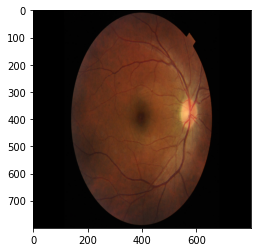

In [ ]:
def resize_image(image, size=(800, 800)):
  # Use cv2.resize() to resize the image
  resized_image = cv2.resize(image, size)

  return resized_image

# Resize the images in the combined_array array
resized_combined_array = []
for image in combined_array:
  resized_image = resize_image(image)
  resized_combined_array.append(resized_image)

# Convert the list to a NumPy array
resized_combined_array = np.array(resized_combined_array)

plt.imshow(resized_combined_array[0])
plt.show()

In [ ]:
# Verifying that all images are the same size -- 800 x 800

same_size = True
reference_shape = resized_combined_array[0].shape
for i in range(1, len(combined_array)):
    if resized_combined_array[i].shape != reference_shape:
        same_size = False
        break

if same_size:
    print("All images are the same size")

    height, width = resized_combined_array.shape[:2]
    print("Image size: {} x {}".format(height, width))
else:
    print("Not all images are the same size")

All images are the same size
Image size: 54 x 800


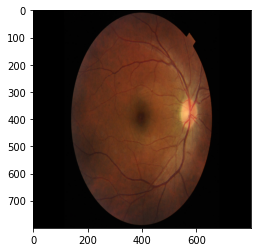

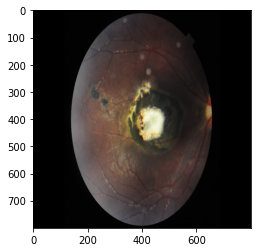

54
0.0
1.0


In [ ]:
# Printing out a few image examples

plt.imshow(resized_combined_array[0])
plt.show()

plt.imshow(resized_combined_array[45])
plt.show()

print(len(resized_combined_array))

print(label_array[5])
print(label_array[45])

In [ ]:
# Download Some Images For Testing

number = 20

cv2.imwrite('no1.jpg', resized_combined_array[number])

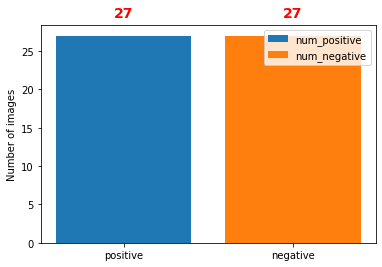

In [ ]:
# Matplotlib Bar Graph Construction -- Verify Dataset

# Count the number of no_dr0 and yes_dr1 images in the combined_array
num_positive = ms_array.shape[0]
num_negative = normal_array.shape[0]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar plot with two bars, one for no_dr0 and one for yes_dr1
ax.bar(0, num_positive, label="num_positive")
ax.bar(1, num_negative, label="num_negative")

# Set the x-axis tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["positive", "negative"])

# Set the y-axis tick labels
ax.set_ylabel("Number of images")

# Add labels to the bar graphs
ax.text(0, num_positive + 2, str(num_positive), ha="center", va="bottom", fontsize=14, color="red", weight="bold")
ax.text(1, num_negative + 2, str(num_negative), ha="center", va="bottom", fontsize=14, color="red", weight="bold")

# Add a legend
ax.legend()

# Show the plot
plt.show()

#Machine Learning Algorithm


In [ ]:
# Necessary imports
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the features and labels from the combined_array_2D array:
X = resized_combined_array # features (colored images)
y = label_array # labels (diagnosis of DR)

# Reshape the features to have 4 dimensions (batch_size, height, width, channels)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 3))

# Split the dataset into training, test, and validation sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25 / 0.75, random_state=42)

# Create the data generator for data augmentation
datagen = ImageDataGenerator (
  rescale=1./255,
  rotation_range=45,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

# Create the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', input_shape=(X.shape[1], X.shape[2], 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  
# Train the model on the augmented data
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=8),
    epochs=30,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
4/4 [==============================] - 19s 2s/step - loss: 24.6458 - accuracy: 0.4231 - val_loss: 7216.5850 - val_accuracy: 0.6429
Epoch 2/30
4/4 [==============================] - 4s 970ms/step - loss: 11.6768 - accuracy: 0.6538 - val_loss: 724.5328 - val_accuracy: 0.6429
Epoch 3/30
4/4 [==============================] - 4s 901ms/step - loss: 4.6003 - accuracy: 0.5000 - val_loss: 53.3607 - val_accuracy: 0.7857
Epoch 4/30
4/4 [==============================] - 4s 1s/step - loss: 0.6941 - accuracy: 0.6538 - val_loss: 21.9197 - val_accuracy: 0.9286
Epoch 5/30
4/4 [==============================] - 4s 1s/step - loss: 0.3896 - accuracy: 0.7692 - val_loss: 26.8957 - val_accuracy: 0.9286
Epoch 6/30
4/4 [==============================] - 5s 1s/step - loss: 0.4911 - accuracy: 0.8462 - val_loss: 131.5316 - val_accuracy: 0.6429
Epoch 7/30
4/4 [==============================] - 4s 1s/step - loss: 0.6537 - accuracy: 0.5385 - val_loss: 115.9744 - val_accuracy: 0.6429
Epoch 8/30
4/4 [====

# Confusion Matrix

- True Positives, True Negatives, False Positives, False Negatives

In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary labels
y_pred = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Use the 'Blues' colormap
plt.imshow(cm, cmap='Blues')

# Define the labels for the cells
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Add labels to the cells
for i in range(2):
  for j in range(2):
    plt.text(j, i, labels[2 * i + j], ha='center', va='center', color='black')

# Add the actual numbers to the cells
for i in range(2):
  for j in range(2):
    plt.text(j, i + 0.2, cm[i, j], ha='center', va='center', color='black')

# Adjust the axis labels and title
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('True vs. Predicted Detection for Multiple Sclerosis')

# Adjust the figure size
plt.figure(figsize=(8, 8))

# Display the plot
plt.show()

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)

# ROC Curve

In [ ]:
# ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for Multiple Sclerosis')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_preds)
print(auc)

In [ ]:
# Learning Curve and Loss Curve:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# TensorFlow Lite Implementation -- Android App


In [ ]:
# Convert Model to TensorFlow Lite -- App Usage -- DO NOT RUN THIS EVERYTIME

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to file
with open('model2.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# Test the TensorFlow Lite Model

img = cv2.imread("no1.jpg")
img = cv2.resize(img, (224,224))
img = np.array(img, dtype="float32")
img = np.reshape(img, (1,224,224,3))

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model2.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']

print(input_details)
print(output_details)

interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)